In [5]:
# ocs_data: 25 occupations and avg. salary distributions during 15 years.
library(readr)
ocs_data <- readRDS("C:/Users/Dell/Desktop/oes.rds")
head(ocs_data)

,2001,2002,2003,2004,2005,2006,2007,2008,2010,2011,2012,2013,2014,2015,2016
Management,70800,78870,83400,87090,88450,91930,96150,100310,105440,107410,108570,110550,112490,115020,118020
Business Operations,50580,53350,56000,57120,57930,60000,62410,64720,67690,68740,69550,71020,72410,73800,75070
Computer Science,60350,61630,64150,66370,67100,69240,72190,74500,77230,78730,80180,82010,83970,86170,87880
Architecture/Engineering,56330,58020,60390,63060,63910,66190,68880,71430,75550,77120,79000,80100,81520,82980,84300
Life/Physical/Social Sci.,49710,52380,54930,57550,58030,59660,62020,64280,66390,67470,68360,69400,70070,71220,72930
Community Services,34190,34630,35800,37050,37530,39000,40540,41790,43180,43830,44240,44710,45310,46160,47200


In [6]:
## Hierarchical Clustering based on Average Linkage Analysis
# Distance calculation in the feature space

dist_ocs <- dist(ocs_data, method = "euclidean")
hc_ocs <- hclust(dist_ocs, method = "average")

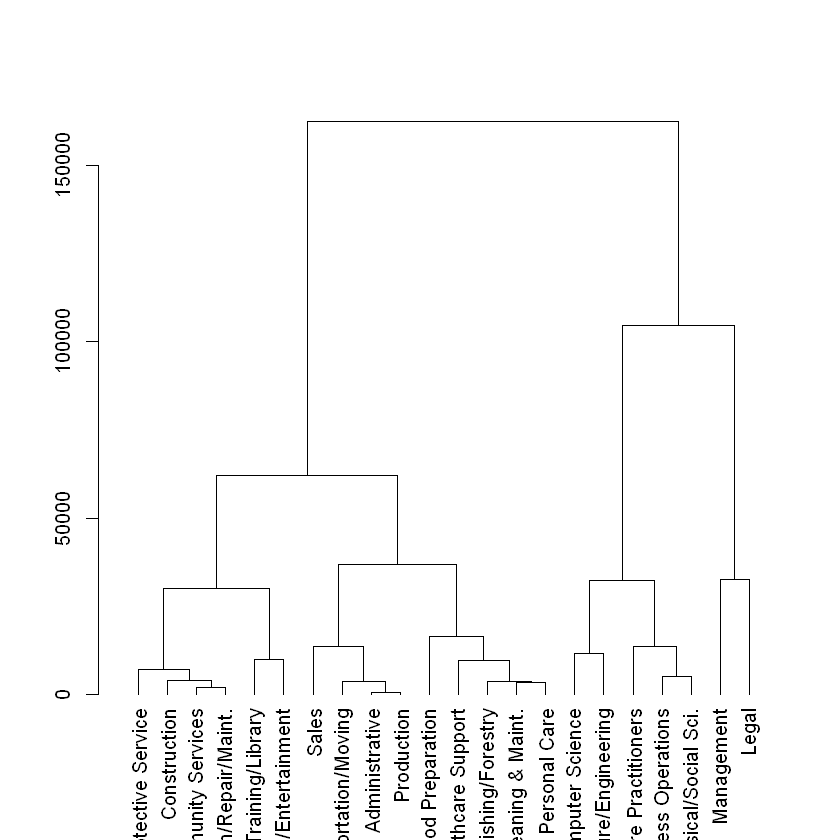

In [8]:
# Creating a dendrogram object
dend_ocs <- as.dendrogram(hc_ocs)
plot(dend_ocs)

Installing package into 'C:/Users/Dell/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'dendextend' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dell\AppData\Local\Temp\Rtmpsl5DZ3\downloaded_packages


Warning message:
"package 'dendextend' was built under R version 3.6.3"
---------------------
Welcome to dendextend version 1.13.4
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:stats':

    cutree



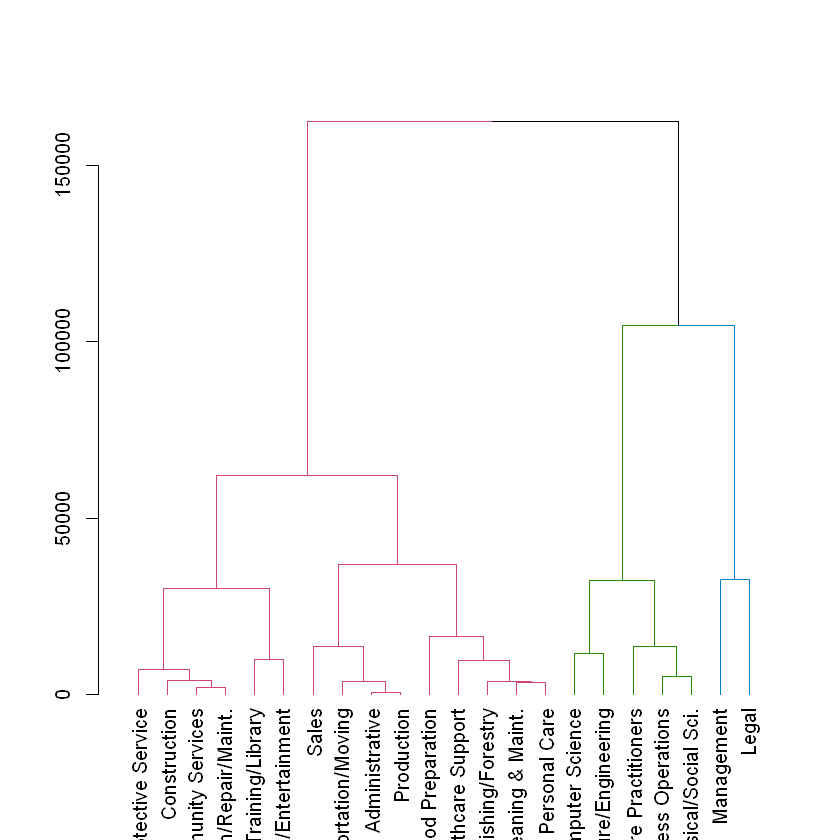

In [9]:
# Color branches by cluster and leverage of height
install.packages("dendextend")
library(dendextend)
dend_colored <- color_branches(dend_ocs, h = 100000)
plot(dend_colored)

In [11]:
# rownames into a column of the data frame
library(tibble)
library(tidyr)
df_ocs <- rownames_to_column(as.data.frame(ocs_data), var = 'occupation')

In [13]:
# Cluster assignment vector at h = 100,000
# Segmented ocs data frame
cut_ocs <- cutree(hc_ocs, h = 100000)

library(dplyr)
clust_ocs <- mutate(df_ocs, cluster = cut_ocs)
head(clust_ocs)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



occupation,2001,2002,2003,2004,2005,2006,2007,2008,2010,2011,2012,2013,2014,2015,2016,cluster
Management,70800,78870,83400,87090,88450,91930,96150,100310,105440,107410,108570,110550,112490,115020,118020,1
Business Operations,50580,53350,56000,57120,57930,60000,62410,64720,67690,68740,69550,71020,72410,73800,75070,2
Computer Science,60350,61630,64150,66370,67100,69240,72190,74500,77230,78730,80180,82010,83970,86170,87880,2
Architecture/Engineering,56330,58020,60390,63060,63910,66190,68880,71430,75550,77120,79000,80100,81520,82980,84300,2
Life/Physical/Social Sci.,49710,52380,54930,57550,58030,59660,62020,64280,66390,67470,68360,69400,70070,71220,72930,2
Community Services,34190,34630,35800,37050,37530,39000,40540,41790,43180,43830,44240,44710,45310,46160,47200,3


In [14]:
# A tidy data frame by gathering the year and values into two columns
gathered_ocs <- gather(data = clust_ocs, 
                       key = year, 
                       value = mean_salary, 
                       -occupation, -cluster)
head(gathered_ocs)

occupation,cluster,year,mean_salary
Management,1,2001,70800
Business Operations,2,2001,50580
Computer Science,2,2001,60350
Architecture/Engineering,2,2001,56330
Life/Physical/Social Sci.,2,2001,49710
Community Services,3,2001,34190


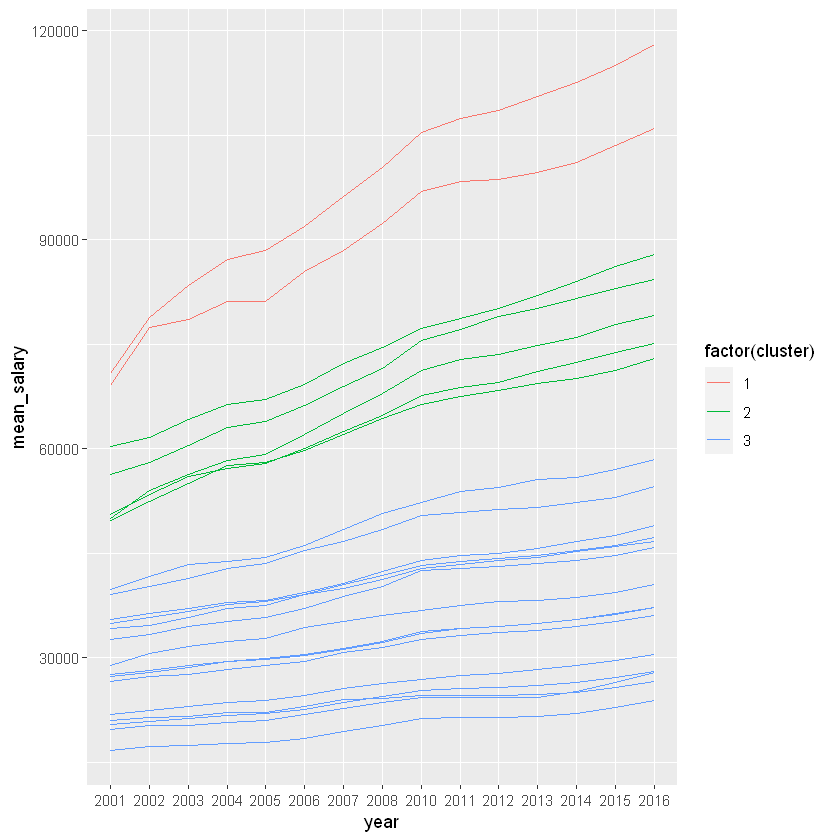

In [15]:
# Plotting the relationship between mean_salary and year by the assigned cluster
library(ggplot2)
ggplot(gathered_ocs, aes(x = year, y = mean_salary, color = factor(cluster))) + 
  geom_line(aes(group = occupation))

In [16]:
## K-Means Algorithm via Elbow Analysis
# Multiple models for multiple values of K
library(purrr)
tot_withinss <- map_dbl(1:10,  function(k){
  model <- kmeans(x = ocs_data, centers = k)
  model$tot.withinss
})

Warning message:
"package 'purrr' was built under R version 3.6.3"

In [17]:
# Data frame appended k and tot_withinss
elbow_df <- data.frame(
  k = 1:10,
  tot_withinss = tot_withinss
)

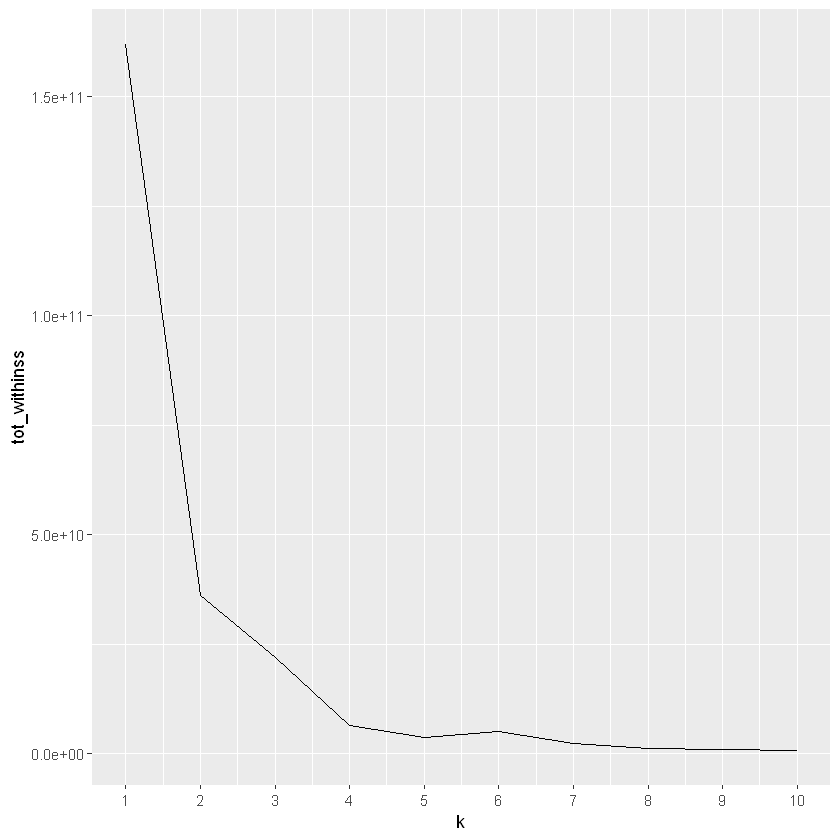

In [18]:
# Building elbow plot
ggplot(elbow_df, aes(x = k, y = tot_withinss)) +
  geom_line() +
  scale_x_continuous(breaks = 1:10)

In [19]:
## Silhouette Width Analysis
# Multiple models for multiple values of K
library(cluster)
sil_width <- map_dbl(2:10,  function(k){
  model <- pam(ocs_data, k = k)
  model$silinfo$avg.width
})

In [20]:
# Generate a data frame containing both k and sil_width
sil_df <- data.frame(
  k = 2:10,
  sil_width = sil_width
)
head(sil_df)

k,sil_width
2,0.6809574
3,0.5665783
4,0.6300043
5,0.6637260
6,0.6361872
7,0.6915586


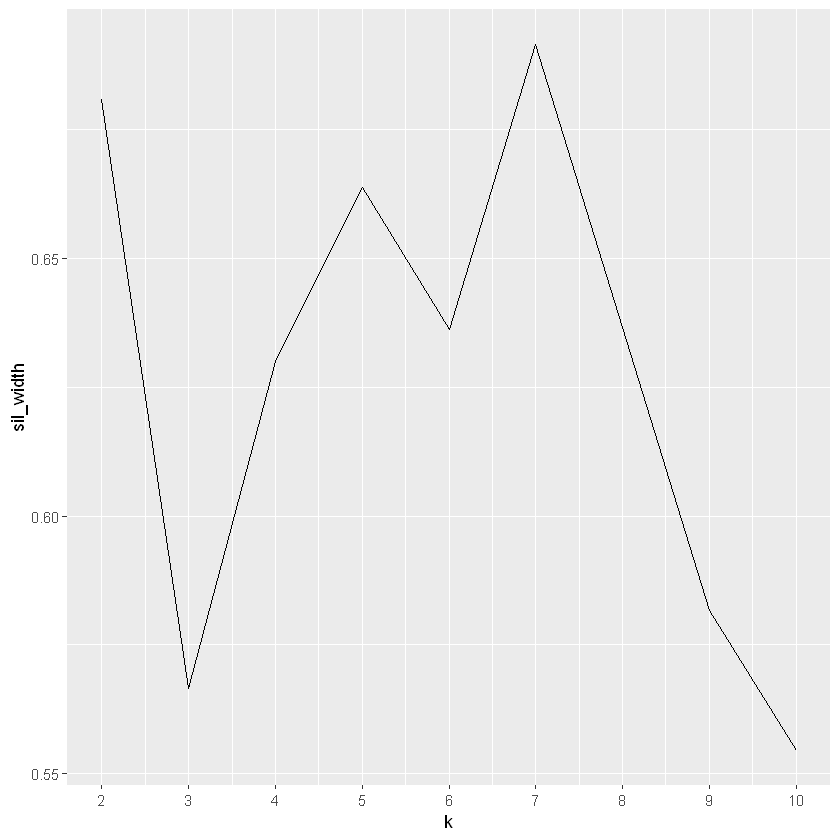

In [21]:
# Plot of relationship between k and sil_width
ggplot(sil_df, aes(x = k, y = sil_width)) +
  geom_line() +
  scale_x_continuous(breaks = 2:10)

In [ ]:
### Interpretation of Findings
## K-Means silhouette width suggests: k=7
## K-Means elbow analysis suggests: k=2
## Hierarchical Clustering suggests: k=3

### My opinion: Hierarchical based clustering seems to make the most sense -> k=3.
## Having similar slopes within goups, 3 distinct cluster identifies seperate unique trends.